<font color="navyblue">
<center>
<h1>LOGISTIC REGRESSION</h1>

<h2>Practical Lab 6 </h2><center></font>
Submitted by Beena Kurian(student ID: 8946601)



<font color="navyblue">
<h3>OBJECTIVES</h3>
</font>

* Using SciKit-Learn, train a binary logistic regression model on the Iris dataset. 
* Use all four features and define only 2 labels: virginica and non-virginica. 
* Evaluate the model and observe failure modes, and shared features

In [1]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



<font color="navyblue">
<h4>1. GET THE DATA</h4>
</font>

From sklearn import datasets and then load iris dataset

In [2]:
iris_df = load_iris(as_frame=True)
X= iris_df.data
y= iris_df.target

In [3]:
iris_df.keys() 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df.data.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2



<font color="navyblue">
<h4>2. Convert the target variables to a binary </h4>
</font>

In [6]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df.target_names[2]

'virginica'

In [8]:
X = iris_df.data
y = iris_df.target

In [9]:
# Setting binary labels: virginica ->1 and non-virginica ->0
y_iris_binary_class = np.where(y == 2, 1, 0)
y_iris_binary_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
label_encoder = LabelEncoder() 
y = label_encoder.fit_transform(iris_df.target_names[y_iris_binary_class])


<font color="navyblue">
<h4>3. Train and Test data split </h4>
</font>

In [11]:
# Train and Test data split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1780)

<font color="navyblue">
<h4>4. Create a logistic regression classifier and train the model on the training set</h4>
</font>

In [12]:
# Building a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<font color="navyblue">
<h4>5. Evaluate the model on the testing set</h4>
</font>

In [13]:
# Prediction using test set
y_pred = model.predict(X_test)

__Accuracy__

In [14]:
# Computing accuracy of the binary classification model
bin_iris_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", bin_iris_accuracy)

Accuracy of the model: 0.9


* An accuracy of approximately 0.90 (or 90 %) suggests that the model a high level of accuracy. 
* This means that it correctly classified approximately 90.00 % of the instances in the test dataset.

__Confusion matrix__

In [15]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[15  2]
 [ 1 12]]


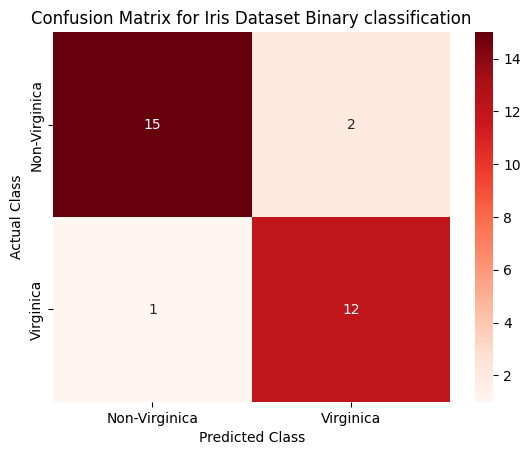

In [16]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Reds", xticklabels=["Non-Virginica", "Virginica"], yticklabels=["Non-Virginica", "Virginica"])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Iris Dataset Binary classification')
plt.show()

Printing TP, TN, FP, FN

In [17]:
TN = confusion_mat[0, 0]
TP = confusion_mat[1, 1]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]
print("True positives(virginica classified, as virginica) = ", TP)
print("True Negatives(non-virginica classified, as non-virginica) = ", TN)
print("False Positives(non-virginica classified, as virginica) = ", FP)
print("False negatives(virginica classified, as non-virginica) = ", FN)

True positives(virginica classified, as virginica) =  12
True Negatives(non-virginica classified, as non-virginica) =  15
False Positives(non-virginica classified, as virginica) =  2
False negatives(virginica classified, as non-virginica) =  1


__Classification Report__

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



__Loss Function__

In [19]:
from sklearn.metrics import log_loss

# Calculate binary cross-entropy loss as this is a binary classification problem
loss = log_loss(y_test, y_pred)

print("Binary Cross-Entropy Loss (Log Loss):", loss)

Binary Cross-Entropy Loss (Log Loss): 3.604365338911715


* A log loss of 3.604 suggests that the predicted probabilities of your model do not align well with the actual binary labels. 
* This could be due to various issues, an unbalanced dataset, or incorrect modeling choices.

__Finding Failure Modes of Model__

In [20]:
# Finding false prediction indices(FP)
FP_indices = [i for i in range(len(y_test)) if y_test[i] == 0 and y_pred[i] == 1]
FP_indices


[15, 23]

In [21]:

# Finding false prediction indices(FN)
FN_indices = [i for i in range(len(y_test)) if y_test[i] == 1 and y_pred[i] == 0]
FN_indices


[3]

In [22]:
indices_of_interest = FP_indices + FN_indices
indices_of_interest

[15, 23, 3]

In [23]:
# Load the Iris dataset into a Pandas DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Find FP predicted target
FP_predicted_target = iris_df.iloc[FP_indices]['target']  
print("index", "target_iris_species")
FP_predicted_target

index target_iris_species


15    0
23    0
Name: target, dtype: int32

In [24]:
# Find FN predicted target
FN_predicted_target = iris_df.iloc[FN_indices]['target']  
print("index", "target_iris_species")
FN_predicted_target

index target_iris_species


3    0
Name: target, dtype: int32

These are the failure data instances

In [25]:
# Access and print the data instances at the specified indices
for index in indices_of_interest:
    data_instance = iris_df.iloc[index]
    print(f"Iris data instance at index {index}:")
    print(data_instance)
    print()

Iris data instance at index 15:
sepal length (cm)    5.7
sepal width (cm)     4.4
petal length (cm)    1.5
petal width (cm)     0.4
target               0.0
Name: 15, dtype: float64

Iris data instance at index 23:
sepal length (cm)    5.1
sepal width (cm)     3.3
petal length (cm)    1.7
petal width (cm)     0.5
target               0.0
Name: 23, dtype: float64

Iris data instance at index 3:
sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
target               0.0
Name: 3, dtype: float64



__Interpret the above result using target_name__: 

* (0.0 -setosa,1.0 -versicolor,2.0 -virginica) 


it is clear that, the model failed for data instances for which the target "setosa"

Also , petal length for all 3 are nearly same.

__Investigation__

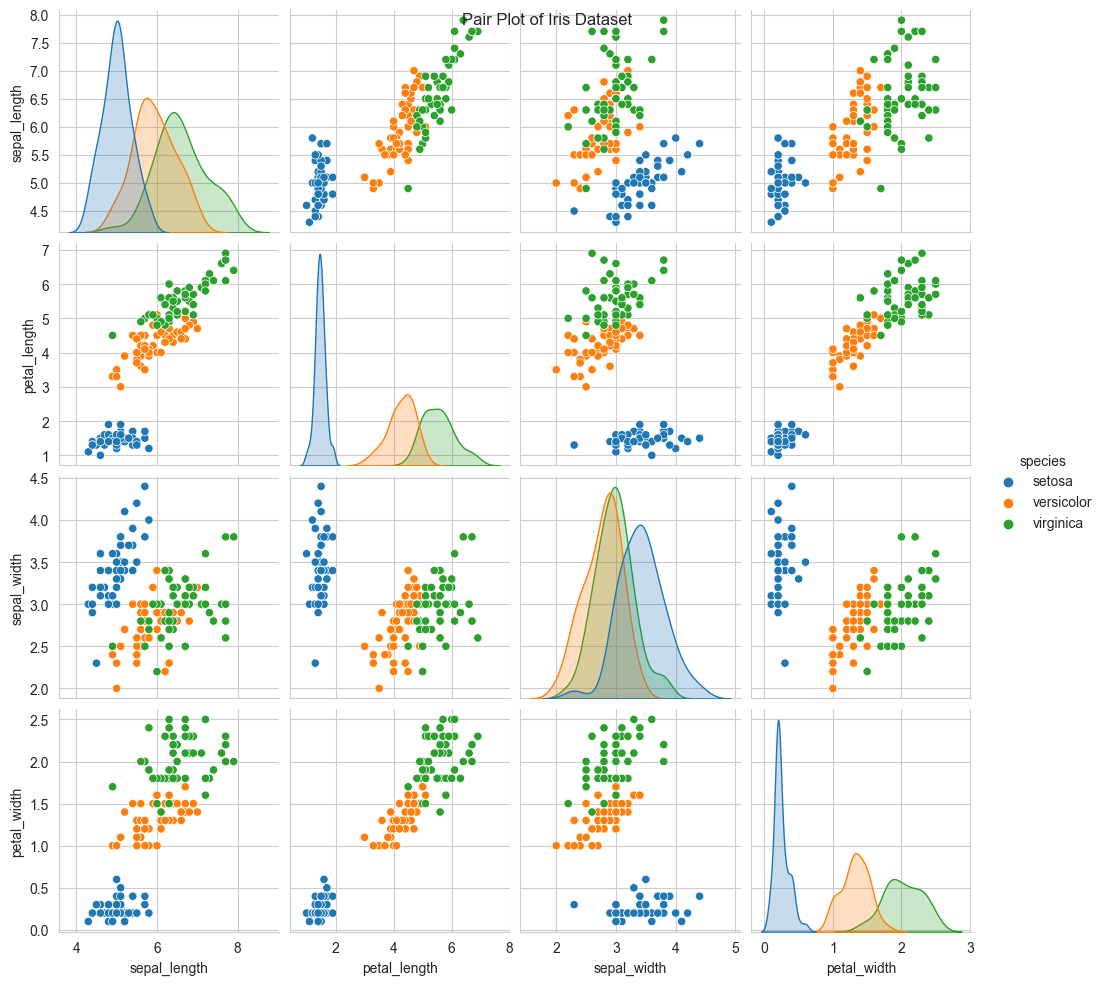

In [26]:
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")

# Create a pair plot to visualize the relationships
sns.pairplot(iris, hue="species", vars=["sepal_length", "petal_length", "sepal_width", "petal_width"])
plt.suptitle("Pair Plot of Iris Dataset")
plt.show()

### Failure modes:


##### In which data instances is the model wrong? 
        * The model failed for index (15,23, 3) data instances
                * False Positives(non-virginica classified, as virginica) =  2 [index: 15, 23]
                * False negatives(virginica classified, as non-virginica) =  1  [index: 3]
                
##### Are there any shared properties for these cases? 
                * Yes, there is a shared property for the above failure cases,
                * Their target_name is "setosa"
                * In my opinion, from the plot of iris dataset, setosa is exhibiting unique features compared to other 2 classes.
                * Versicolor and Virginica, have similar characteristics.
                * But in this analysis, we have combined versicolor and setosa into "non-virginica" class.
                * So the model learned versicolor and setosa characteristics as a single category.
                * Setosa is more separable from the other two classes in some feature space.
                * but the model is not able to capture this well.
                 
##### How is the model doing across a set of evaluation metrics: accuracy and confusion metric.
                * Accuracy of the model: 0.9
                * [[15  2]
                  [ 1 12]]
                * The model is performing good for the above metrics.
                * Binary cross-entropy loss can be calculated for evaluating the model.
                * Lower log loss values are preferred, as they indicate better model performance.

I've experimented with various random states during model evaluation and I achieved 100% accuracy on some random states. 
However, to gain a more comprehensive understanding of my model's performance and to conduct a thorough failure analysis, I intentionally selected a specific random state that would produce false positive and false negative predictions.